In [14]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.style
matplotlib.style.use("bayesian_stats_course_tools.light")

Text(0, 0.5, 'Estimate of $\\pi$')

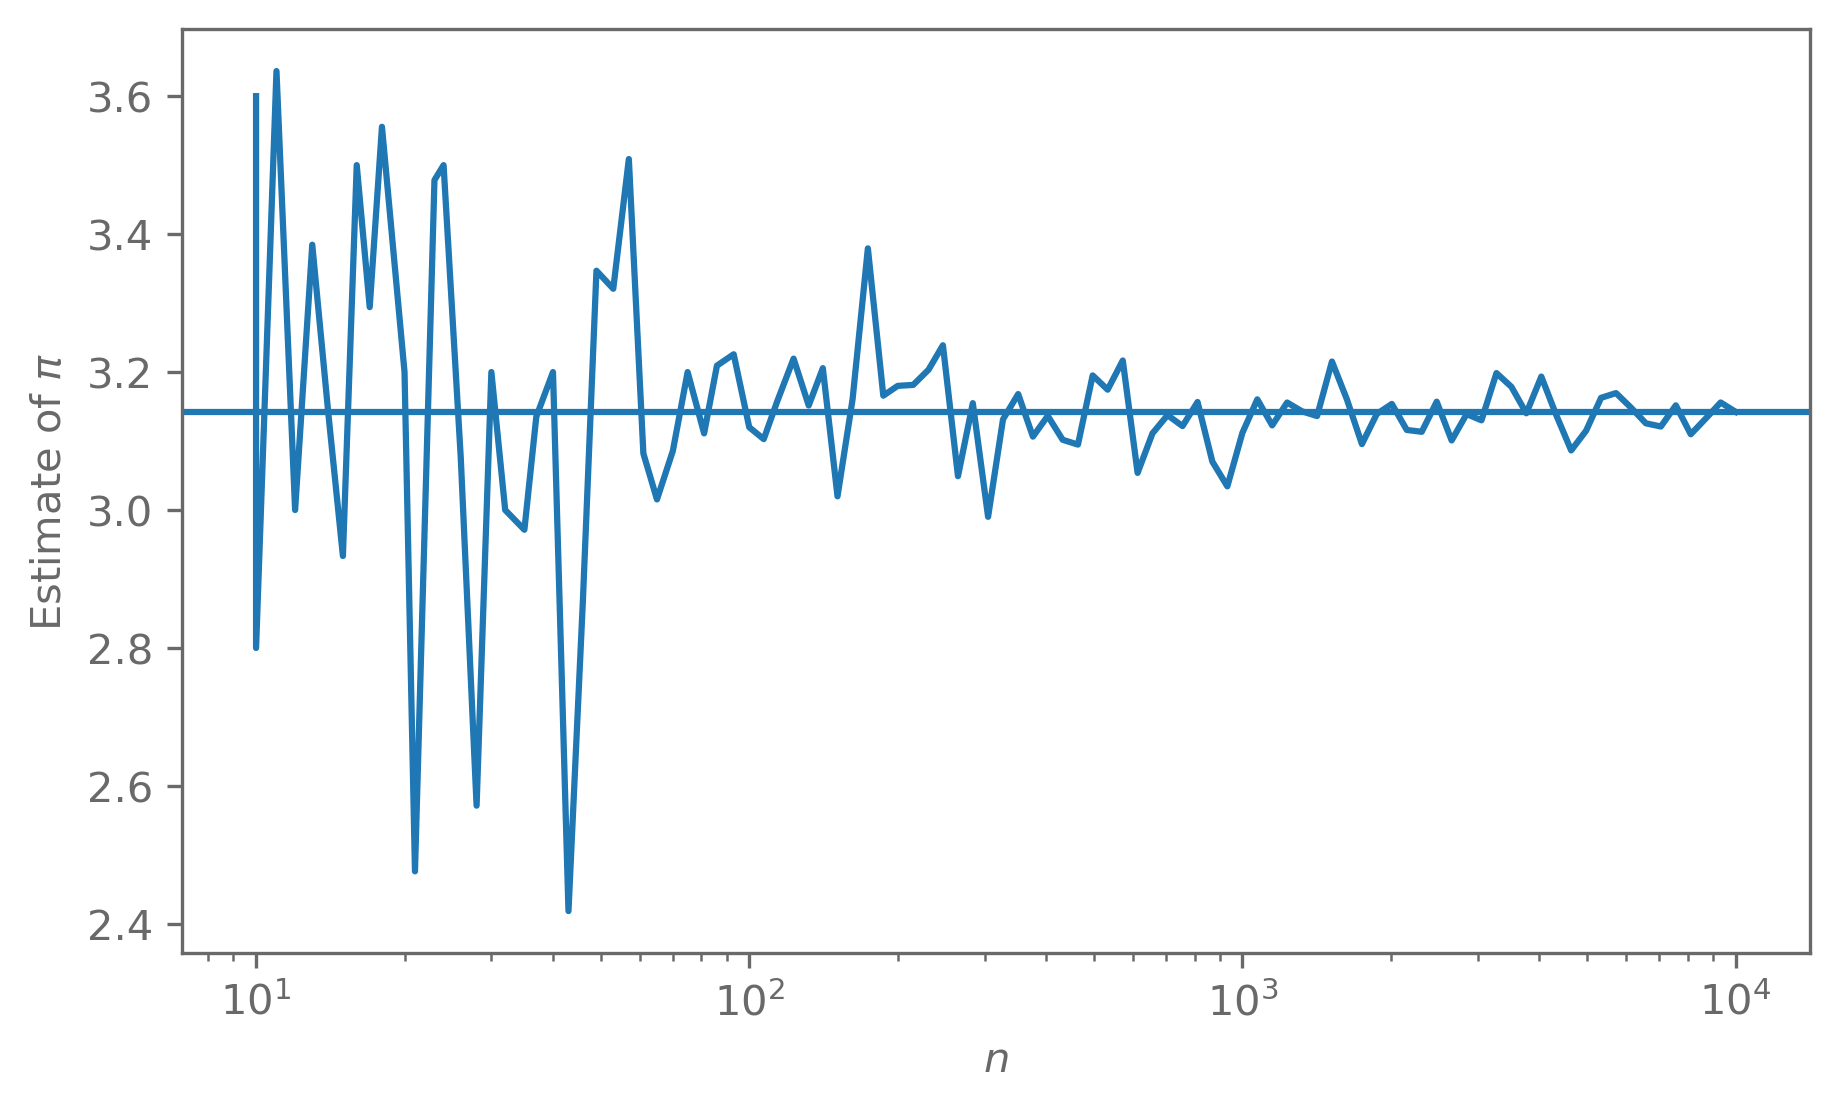

In [15]:
def estimate_pi(n):
    s = np.random.uniform(size=(n, 2))

    n_inside = np.sum(s[:,0]**2 + s[:,1]**2 < 1)

    return 4*n_inside/n

n = np.geomspace(10, 10000, 100, dtype=int)

plt.plot(n, [estimate_pi(n_) for n_ in n])
plt.axhline(np.pi)
plt.xscale("log")

plt.xlabel("$n$")
plt.ylabel(r"Estimate of $\pi$")

### In d dimensions

Volume of a unit (hyper) ball vs a (hyper) cube with side length of 2:
 
$$
    \frac{\text{volume of unit ball}}{\text{volume of hypercube}} = \frac{\pi^\frac{d}{2}}{\Gamma(\frac{d}{2}+1)}\frac{1}{2^d}
$$


Text(0, 0.5, 'Estimate of $\\pi$')

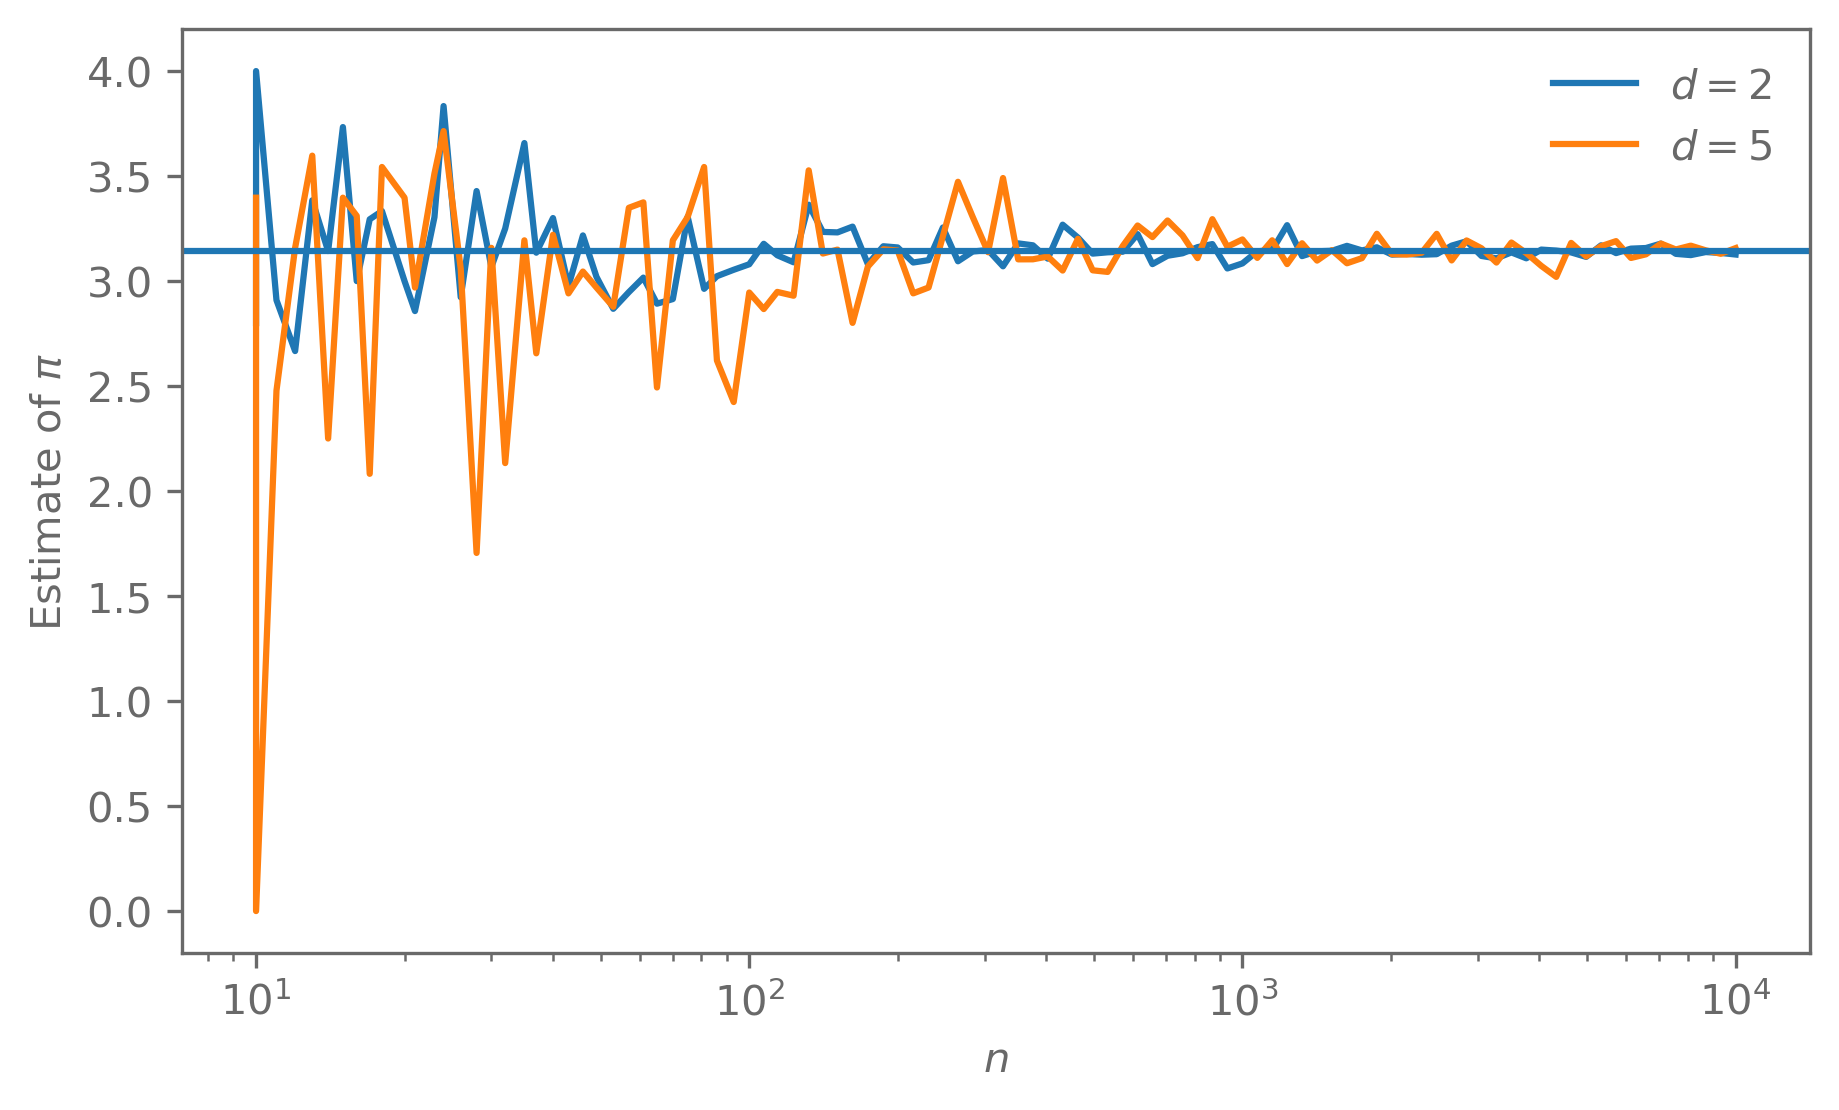

In [16]:
import scipy.special


def estimate_pi_nd(n, d):
    s = np.random.uniform(size=(n, d))
    r2 = np.sum(s**2, axis=1)

    n_inside = np.sum(r2 < 1)
    # Volume of unit d-ball: \pi^{n/2} / \Gamma(n/2 + 1)
    return (2**d * scipy.special.gamma(d/2 + 1) * n_inside/n)**(2/d)

n = np.geomspace(10, 10000, 100, dtype=int)

plt.plot(n, [estimate_pi_nd(n_, 2) for n_ in n], label="$d=2$")
plt.plot(n, [estimate_pi_nd(n_, 5) for n_ in n], label="$d=5$")
plt.axhline(np.pi)
plt.xscale("log")
plt.legend()

plt.xlabel("$n$")
plt.ylabel(r"Estimate of $\pi$")

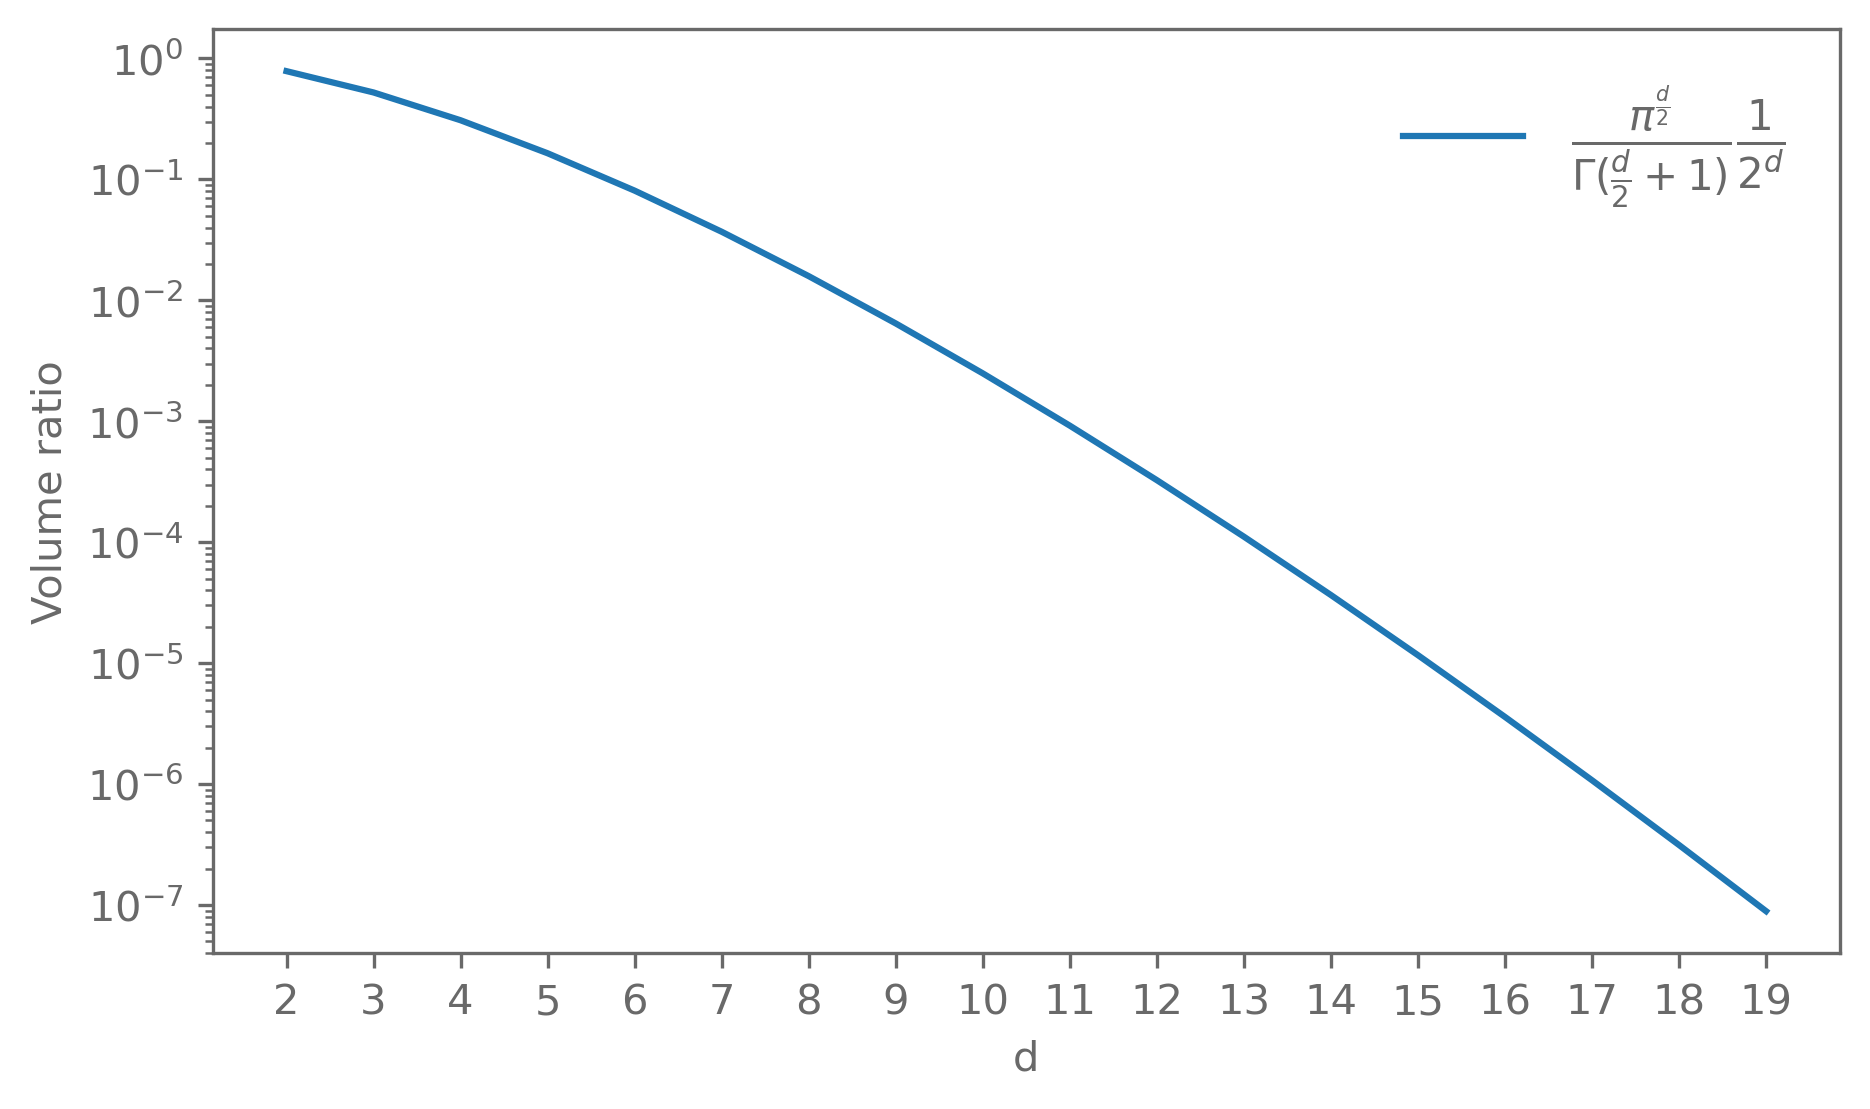

In [17]:
from scipy.special import gamma as Gamma
n = np.arange(2, 20)
acceptance_rate = np.pi**(n/2)/Gamma(n/2+1)/2**n

fig, ax = plt.subplots()
ax.semilogy(n, acceptance_rate, label=r"$\frac{\pi^\frac{d}{2}}{\Gamma(\frac{d}{2}+1)}\frac{1}{2^d}$")
ax.set_xlabel("d")
ax.set_ylabel("Volume ratio")
ax.set_xticks(n)
ax.legend(frameon=False, fontsize="x-large")
fig.dpi = 300